# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [69]:
%run ../test/test_algorithms.py

..........
----------------------------------------------------------------------
Ran 10 tests in 0.129s

OK


In [67]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.037s

OK


In [4]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


In [5]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Running example of the system

In [6]:
%run ../tools/algorithms.py

In [7]:
%run ../tools/dataloader.py

In [8]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [9]:
prices = test.get_close()

In [10]:
prices

,Close
Date,
2009-01-02,3.241071
2009-01-05,3.377857
2009-01-06,3.322143
2009-01-07,3.250357
2009-01-08,3.310714
...,...
2010-02-04,6.858929
2010-02-05,6.980714
2010-02-08,6.932857


In [11]:
#prices = np.array(prices)
#len(prices)

In [12]:
prices

,Close
Date,
2009-01-02,3.241071
2009-01-05,3.377857
2009-01-06,3.322143
2009-01-07,3.250357
2009-01-08,3.310714
...,...
2010-02-04,6.858929
2010-02-05,6.980714
2010-02-08,6.932857


In [13]:
%run ../tools/predictorsI.py

In [14]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [15]:
op0.create_bilstm()

In [16]:
op0.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 25, 100)           20800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [17]:
op0.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 46ms/step - loss: 21.9913 - mean_squared_error: 21.9913 - val_loss: 13.9966 - val_mean_squared_error: 13.9966
Epoch 2/10
20/20 [==============================] - 0s 18ms/step - loss: 3.7463 - mean_squared_error: 3.7463 - val_loss: 2.2233 - val_mean_squared_error: 2.2233
Epoch 3/10
20/20 [==============================] - 0s 17ms/step - loss: 0.6251 - mean_squared_error: 0.6251 - val_loss: 0.8816 - val_mean_squared_error: 0.8816
Epoch 4/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2216 - mean_squared_error: 0.2216 - val_loss: 0.3390 - val_mean_squared_error: 0.3390
Epoch 5/10
20/20 [==============================] - 0s 16ms/step - loss: 0.1360 - mean_squared_error: 0.1360 - val_loss: 0.2437 - val_mean_squared_error: 0.2437
Epoch 6/10
20/20 [==============================] - 0s 17ms/step - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.1558 - val_mean_squared_error: 0.1558
Epoch 7/10
20/20 [============

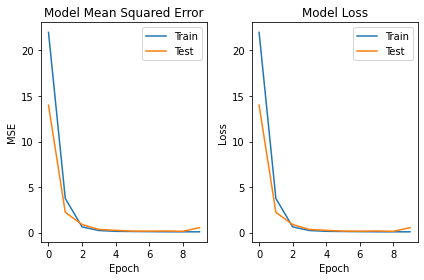

In [18]:
op0.show_performance()

In [19]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [20]:
nice = op0.predict(oyea)
nice

,Bidirectional LSTM
0,6.981127
1,7.293480
2,6.425726
3,7.495827
4,7.578663
5,6.643592
6,8.182841


In [21]:
op1.create_lstm()

In [22]:
op1.model_blueprint()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 25, 40)            6720      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 50)            18200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [23]:
op1.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 46ms/step - loss: 21.5897 - mean_squared_error: 21.5897 - val_loss: 213.2412 - val_mean_squared_error: 213.2412
Epoch 2/10
20/20 [==============================] - 1s 25ms/step - loss: 11.5143 - mean_squared_error: 11.5143 - val_loss: 6.0122 - val_mean_squared_error: 6.0122
Epoch 3/10
20/20 [==============================] - 0s 22ms/step - loss: 1.6485 - mean_squared_error: 1.6485 - val_loss: 1.1164 - val_mean_squared_error: 1.1164
Epoch 4/10
20/20 [==============================] - 0s 19ms/step - loss: 0.2219 - mean_squared_error: 0.2219 - val_loss: 0.3703 - val_mean_squared_error: 0.3703
Epoch 5/10
20/20 [==============================] - 0s 20ms/step - loss: 0.1322 - mean_squared_error: 0.1322 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 6/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.3363 - val_mean_squared_error: 0.3363
Epoch 7/10
20/20 [========

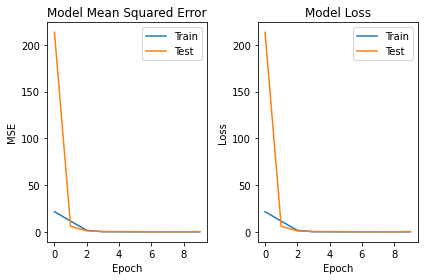

In [24]:
op1.show_performance()

In [25]:
nice = op1.predict(oyea)
nice

,LSTM
0,7.444017
1,7.485474
2,7.953871
3,7.617049
4,7.955699
5,8.169379
6,7.753589


In [26]:
op2.create_cnn()

In [27]:
op2.model_blueprint()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                17650     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
__________________________________________________

In [28]:
op2.fit_model(10)

Epoch 1/10
20/20 [==============================] - 0s 8ms/step - loss: 13.1028 - mean_squared_error: 13.1028 - val_loss: 4.3357 - val_mean_squared_error: 4.3357
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8406 - mean_squared_error: 0.8406 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1509 - mean_squared_error: 0.1509 - val_loss: 0.2541 - val_mean_squared_error: 0.2541
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.2608 - val_mean_squared_error: 0.2608
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.2363 - val_mean_squared_error: 0.2363
Epoch 7/10
20/20 [====================

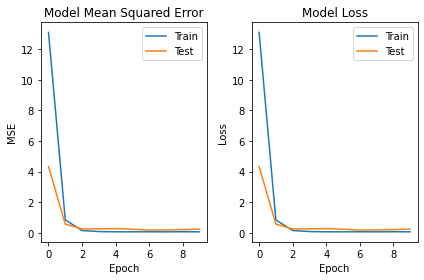

In [29]:
op2.show_performance()

In [30]:
nice = op2.predict(oyea)
nice

,CNN
0,7.571640
1,7.636959
2,7.629258
3,7.693495
4,7.731886
5,7.737085
6,7.691160


In [31]:
op3.create_mlp()

In [32]:
op3.model_blueprint()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 182       
Total params: 3,407
Trainable params: 3,407
Non-trainable params: 0
_________________________________________________________________


In [33]:
op3.fit_model(100)

Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 24.1870 - mean_squared_error: 24.1870 - val_loss: 31.2576 - val_mean_squared_error: 31.2576
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 12.5680 - mean_squared_error: 12.5680 - val_loss: 11.5083 - val_mean_squared_error: 11.5083
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5404 - mean_squared_error: 3.5404 - val_loss: 2.1975 - val_mean_squared_error: 2.1975
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3839 - mean_squared_error: 0.3839 - val_loss: 0.2401 - val_mean_squared_error: 0.2401
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.2482 - val_mean_squared_error: 0.2482
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7/100
20/20 [=======

20/20 [==============================] - 0s 2ms/step - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 52/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 53/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 54/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1636 - val_mean_squared_error: 0.1636
Epoch 55/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 56/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 57/100
20/20 [=====================

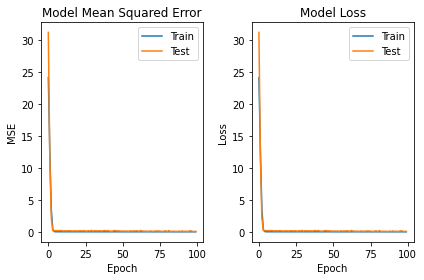

In [34]:
op3.show_performance()

In [35]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [36]:
nice = op3.predict(oyea)
nice

,MLP
0,7.016368
1,7.353357
2,7.350390
3,7.333137
4,7.241974
5,7.493763
6,7.504691


In [37]:
%run ../tools/predictorsII.py

In [38]:
oo = UnivariatePredictorII(prices, 7)

In [39]:
oo.fit_neural_model(100,"D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-05
Epoch[100/100]: 100%|█| 100/100 [00:04<00:00, 23.52it/s, SmoothL1Loss=0.363, MAE=3.8, RegLoss=0, MAE_val=3.99, SmoothL1


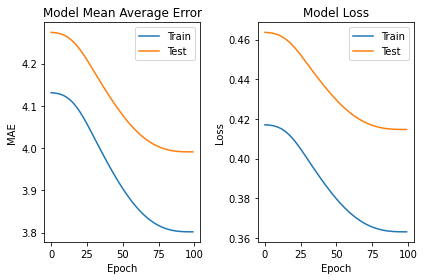

In [40]:
oo.show_performance_neural()

In [41]:
oo.predict_neural()

,Neural Prophet
0,7.858598
1,11.582884
2,6.680636
3,14.030499
4,5.648793
5,-0.428853
6,2.138511


In [42]:
oo.fit_prophet_model()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 50 forecasts with cutoffs between 2009-08-15 12:00:00 and 2010-02-03 00:00:00


  0%|          | 0/50 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 00:00:00,0.061154,0.247293,0.202087,0.029285,0.030000,0.625000
1,1 days 12:00:00,0.065897,0.256705,0.198447,0.028946,0.022455,0.609375
2,2 days 00:00:00,0.083575,0.289093,0.234182,0.033957,0.034854,0.483696
3,2 days 12:00:00,0.059378,0.243676,0.180051,0.026026,0.018797,0.720000
4,3 days 12:00:00,0.053277,0.230818,0.185698,0.027001,0.024332,0.640000
5,4 days 12:00:00,0.077778,0.278887,0.225152,0.032715,0.027796,0.583333
6,5 days 00:00:00,0.086568,0.294225,0.229526,0.033036,0.026833,0.607639
7,5 days 12:00:00,0.100804,0.317496,0.257112,0.037308,0.036535,0.483696
8,6 days 00:00:00,0.077016,0.277518,0.209196,0.030107,0.023650,0.640000
9,7 days 00:00:00,0.070612,0.265729,0.215752,0.031163,0.027964,0.600000


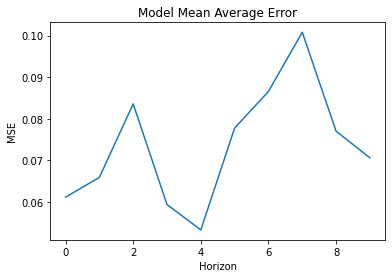

In [43]:
oo.show_performance_prophet()

In [44]:
oo.predict_prophet()

,Prophet
0,7.309689
1,7.288514
2,7.412138
3,7.413944
4,7.306175
5,7.295620
6,7.317085


In [45]:
%run ../tools/predictorsIII.py

In [46]:
len(prices)

279

In [47]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [48]:
op4.create_cnnlstm()

In [49]:
op4.model_blueprint()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 11, 64)      192       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 10, 32)      4128      
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 5, 32)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 160)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 50)          42200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                

In [50]:
op4.fit_model(10)

Epoch 1/10
20/20 [==============================] - 0s 22ms/step - loss: 24.8605 - mean_squared_error: 24.8605 - val_loss: 24.5609 - val_mean_squared_error: 24.5609
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 7.1074 - mean_squared_error: 7.1074 - val_loss: 3.6779 - val_mean_squared_error: 3.6779
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7514 - mean_squared_error: 0.7514 - val_loss: 0.8648 - val_mean_squared_error: 0.8648
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1449 - mean_squared_error: 0.1449 - val_loss: 0.6196 - val_mean_squared_error: 0.6196
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.4893 - val_mean_squared_error: 0.4893
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.3605 - val_mean_squared_error: 0.3605
Epoch 7/10
20/20 [=================

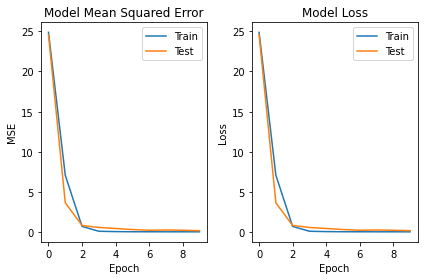

In [51]:
op4.show_performance()

In [52]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [53]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

,CNN-LSTM
0,7.565029
1,7.406779
2,7.919835
3,7.721859
4,7.745745
5,7.796144
6,7.584039


<AxesSubplot:>

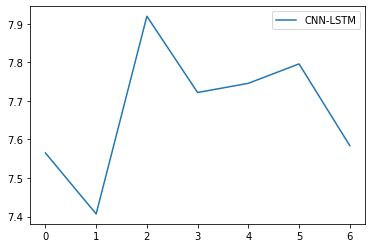

In [54]:
nice.plot()